In [33]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
reviews_train = load_files("D:/Prog/ML/tasks for education/LogReg/aclImdb/train")
text_train, y_train = reviews_train.data, reviews_train.target

KeyboardInterrupt: 

In [ ]:
print('Number of documents in training data: %d' %len(text_train))
print(np.bincount(y_train))

In [ ]:
reviews_test = load_files("D:/Prog/ML/tasks for education/LogReg/aclImdb/test")
text_ttest, y_ttest = reviews_test.data, reviews_test.target
print('Number of documents in training data: %d' %len(text_test))
print(np.bincount(y_test))

In [ ]:
cv = CountVectorizer()
cv.fit(text_train)

print(len(cv.vocabulary_))

In [ ]:
print(cv.get_feature_names()[10:20])
print(cv.get_feature_names()[50000:50020])

In [ ]:
X_train = cv.transform(text_train)
X_test = cv.transform(text_test)

In [ ]:
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)
print(round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3))

In [ ]:
def visualize_coefficients(classifier, features_names, n_top_features=25):
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting-coefficients = np.hstack([negative_coefficients, positive_coefficients])
    
    plt.figure(figsize=(15,5))
    colors = ['red' if c< 0 else 'blue' for c in coef[interesting_coefficients]]
    plt.bar(np.range(2*n_top_features), coef[interesting_coefficients], color=colors)
    plt.xticks(np.arange(1, 1+2*n_top_features), feature_names[interesting_coefficients], rotation=60, ha='right')

In [ ]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'], color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'], color='red', label='test')
    plt.legend()
vizualize_coefficients(logit, cv.get_feature_names())

In [ ]:
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(), 
LogisticRegression(n_jobs=-1, random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)
grid_logit.best_params_, grid_logit.best_score_
plot_grid_scores(grid_logit, 'logisticregression__C')
grid_logit.score(text_test, y_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1)
forest.fit(X_train, y_train)
print(round(forest.score(X_test,y_test), 3))

NameError: name 'X_train' is not defined

In [40]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)

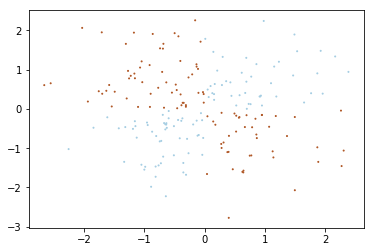

In [47]:
plt.scatter(X[:, 0], X[:, 1], s = 1, c=y, cmap=plt.cm.Paired)

In [15]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:,1]
    Z = Z.reshape(xx.shape)
    
    image = plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
    linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$<!-- math>$inline$x_1$inline$</math -->$')
    plt.ylabel(r'$<!-- math>$inline$x_2$inline$</math -->$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

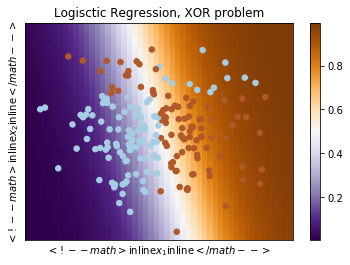

In [16]:
plot_boundary(LogisticRegression(), X, y, 'Logisctic Regression, XOR problem')

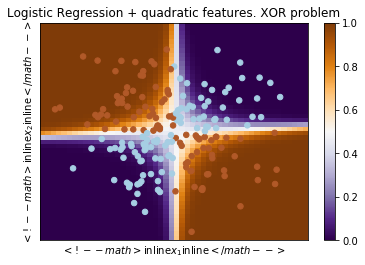

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
('logit', LogisticRegression())])
plot_boundary(logit_pipe, X, y,
"Logistic Regression + quadratic features. XOR problem")

In [22]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import validation_curve

In [23]:
df = pd.read_csv('D:/Prog/ML/tasks for education/LogReg/telecom_churn.csv').drop('State', axis=1)

In [25]:
df['International plan'] = df['International plan'].map({'Yes':1, 'No':0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})

In [26]:
y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

In [29]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss='log', n_jobs=-1)
logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), ('sgd_logit', sgd_logit)])
val_train, val_test = validation_curve(logit_pipe, X, y, 'sgd_logit__alpha', alphas, cv=5, scoring='roc_auc')

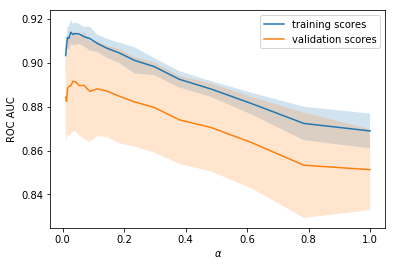

In [31]:
def plot_with_err(x, data, **kwards):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwards)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel(r'$\alpha$'); plt.ylabel('ROC AUC')
plt.legend();

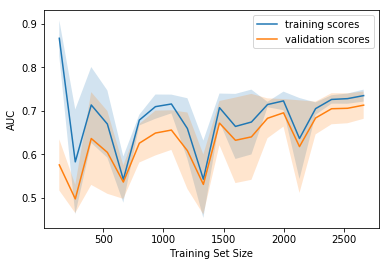

In [32]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)), 
    ('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
    X, y, train_sizes=train_sizes, cv=5,
    scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()

plot_learning_curve(degree=2, alpha=10)